In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sweetviz as sv
import IPython
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from urllib.parse import unquote

In [2]:
df_train = pd.read_csv("train.csv")
print(df_train.shape)
df_train.head

(7613, 5)


<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...  

In [4]:
cols = ['keyword', 'location']
missing_values = df_train[cols].isnull().sum()
print("Count of the missing values of keyword and location")
print(missing_values)


Count of the missing values of keyword and location
keyword       61
location    2533
dtype: int64


In [5]:
unique_loc = df_train['location'].unique().shape[0]
print("\nThere are", unique_loc, "uniqe locations")
unique_key = df_train['keyword'].unique().shape[0]
print("\nThere are", unique_key, "uniqe keywords")


There are 3342 uniqe locations

There are 222 uniqe keywords


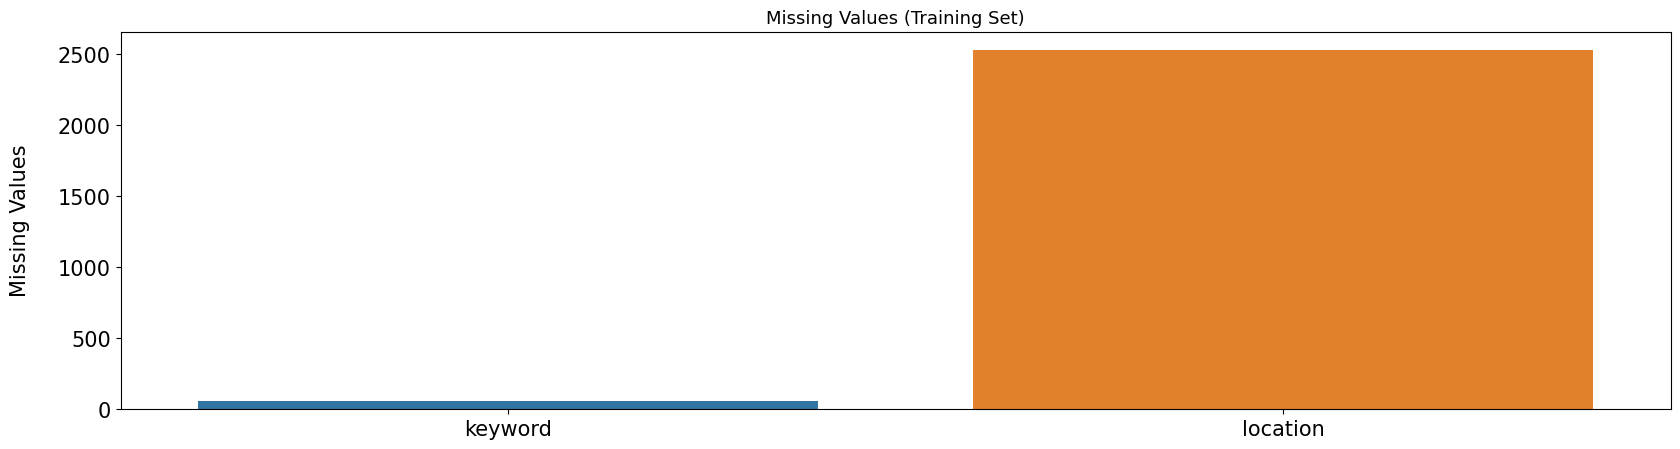

In [6]:
fig, axes = plt.subplots(ncols=1, figsize=(20, 5), dpi=100)
sns.barplot(x=cols, y=missing_values, ax=axes)
axes.set_ylabel('Missing Values', size=15, labelpad=20)
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
axes.set_title('Missing Values (Training Set)', fontsize=13)
plt.show()

In [ ]:
groupedvalues = df.groupby('target').sum().reset_index()
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x='day', y='tip',
                 data=groupedvalues,
                 errwidth=0)
 
# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

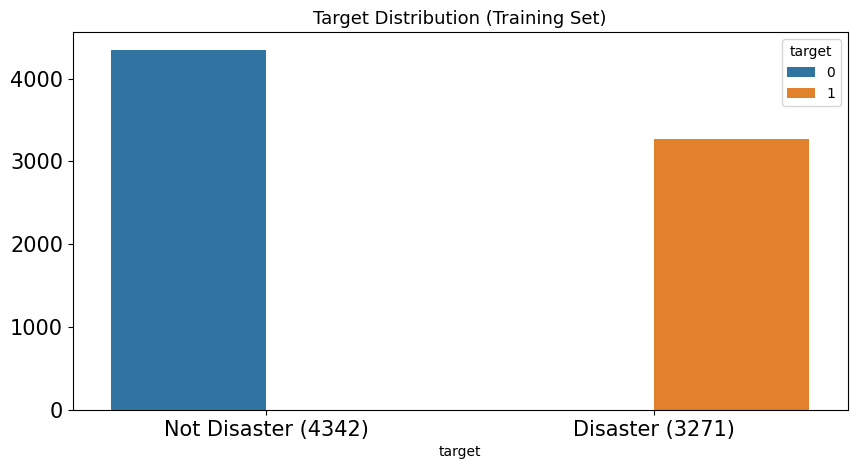

In [36]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 5), dpi=100)
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes)
axes.set_ylabel('')
axes.set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
axes.set_title('Target Distribution (Training Set)', fontsize=13)
#labels=['Not Disaster (57%)', 'Disaster (43%)']
plt.show()

<AxesSubplot:>

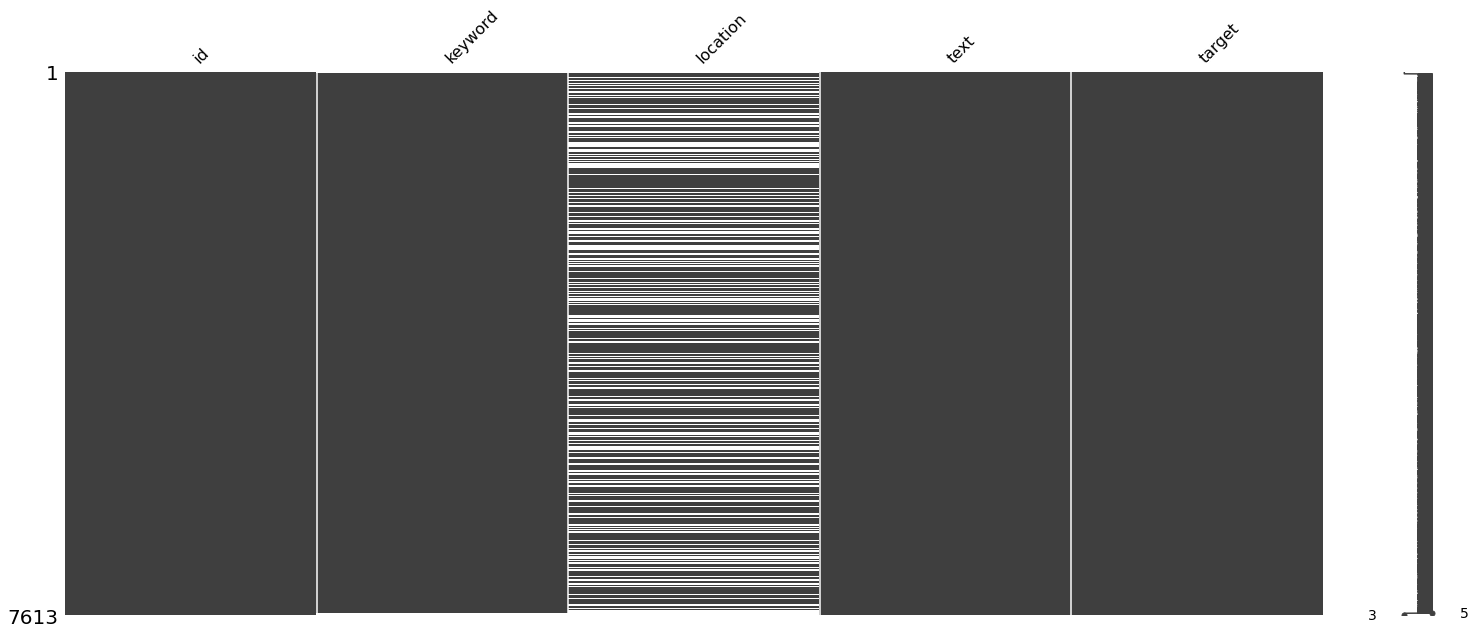

In [7]:
msno.matrix(df_train)

In [35]:
df2=df_train[df_train.keyword.notnull()] 
df = df2.groupby(['keyword']).head(5)


In [36]:
print(df['keyword'].unique().shape[0])

221


In [4]:
df2=df_train[df_train.location.notnull()] 
#df = df2.groupby(['location'])

df3 = pd.DataFrame(df2.location.value_counts())

In [15]:
len(df3)

3341

In [6]:
df3.to_excel('data.xlsx', index=True)

Text(0.5, 1.0, 'Location Frequency')

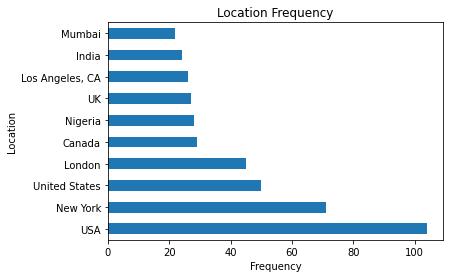

In [48]:
df2=df_train[df_train.location.notnull()] 
#df = df2.groupby(['location'])

df2.location.value_counts()[:10].plot(kind='barh'),
plt.xlabel("Frequency")
plt.ylabel("Location")
plt.title('Location Frequency')

Text(0.5, 1.0, 'Keyword Frequency')

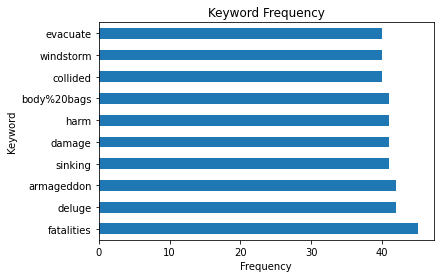

In [53]:
df=df_train[df_train.keyword.notnull()] 
#df = df2.groupby(['location'])

df.keyword.value_counts()[:10].plot(kind='barh'),
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.title('Keyword Frequency')

### Lemmatization

In [8]:
df_train['keyword'].fillna('', inplace=True)
df_train['keyword'] = df_train.keyword.apply(lambda x: unquote(x))
counter = Counter(df_train['keyword'].to_list())
print("Most common keywords after unquote:")
counter.most_common()[:5]

Most common keywords after unquote:


[('', 61),
 ('fatalities', 45),
 ('armageddon', 42),
 ('deluge', 42),
 ('body bags', 41)]

In [10]:
lemmatizer = WordNetLemmatizer()
for i in range(0, len(df_train)):
    df_train.keyword[i] = lemmatizer.lemmatize(df_train.keyword[i])

/Users/zhanzhuoyi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df_train.keyword.unique()

array(['', 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualty', 'catastrophe',
       'catastrophic', 'chemical emergency', 'cliff fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desolate', 'desolation', 'dest

In [12]:
len(df_train.keyword.unique())

214

Text(0.5, 1.0, 'Keyword Frequency after Lemmatization')

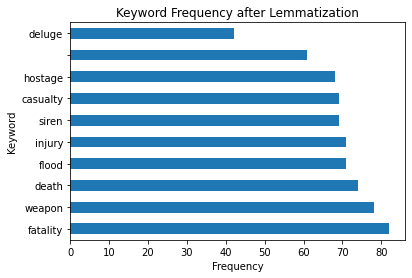

In [24]:
df_train.keyword.value_counts()[:10].plot(kind='barh'),
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.title('Keyword Frequency after Lemmatization')

In [30]:
df_train.keyword.value_counts()[:10].values

array([82, 78, 74, 71, 71, 69, 69, 68, 61, 42])

In [38]:
print("Top 10 Keywords")
df_train.keyword.value_counts()[:10]

Top 10 Keywords


fatality    82
weapon      78
death       74
flood       71
injury      71
siren       69
casualty    69
hostage     68
            61
deluge      42
Name: keyword, dtype: int64

In [17]:
ps = PorterStemmer()
result = []
for i in range(0, len(df_train)):
    result.append(ps.stem(df_train.keyword[i]))
df_train["keyword_stem"] =result
df_train.keyword_stem.unique()

array(['', 'ablaz', 'accid', 'aftershock', 'airplane accid', 'ambul',
       'annihil', 'apocalyps', 'armageddon', 'armi', 'arson', 'arsonist',
       'attack', 'avalanch', 'battl', 'bioterror', 'blaze', 'bleed',
       'blew up', 'blight', 'blizzard', 'blood', 'bloodi', 'blown up',
       'body bag', 'bomb', 'bridge collaps', 'buildings burn',
       'buildings on fir', 'burn', 'burning build', 'bush fir',
       'casualti', 'catastroph', 'chemical emerg', 'cliff fal', 'collaps',
       'collid', 'collis', 'crash', 'crush', 'curfew', 'cyclon', 'damag',
       'danger', 'dead', 'death', 'debri', 'delug', 'demolish', 'demolit',
       'derail', 'desol', 'destroy', 'destruct', 'deton', 'devast',
       'disast', 'displac', 'drought', 'drown', 'dust storm', 'earthquak',
       'electrocut', 'emerg', 'emergency plan', 'emergency servic',
       'engulf', 'epicentr', 'evacu', 'explod', 'explos', 'eyewit',
       'famin', 'fatal', 'fear', 'fire', 'fire truck', 'first respond',
       'flame'

In [18]:
len(df_train.keyword_stem.unique())

167

Text(0.5, 1.0, 'Keyword Frequency after Stemming')

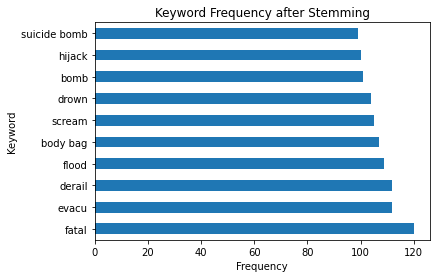

In [23]:
df_train.keyword_stem.value_counts()[:10].plot(kind='barh'),
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.title('Keyword Frequency after Stemming')

In [20]:
counter = Counter(df_train['keyword_stem'].to_list())
print("Most common keywords after stemming")
counter.most_common()[:10]

Most common keywords after stemming


[('fatal', 120),
 ('derail', 112),
 ('evacu', 112),
 ('flood', 109),
 ('body bag', 107),
 ('scream', 105),
 ('drown', 104),
 ('bomb', 101),
 ('hijack', 100),
 ('suicide bomb', 99)]